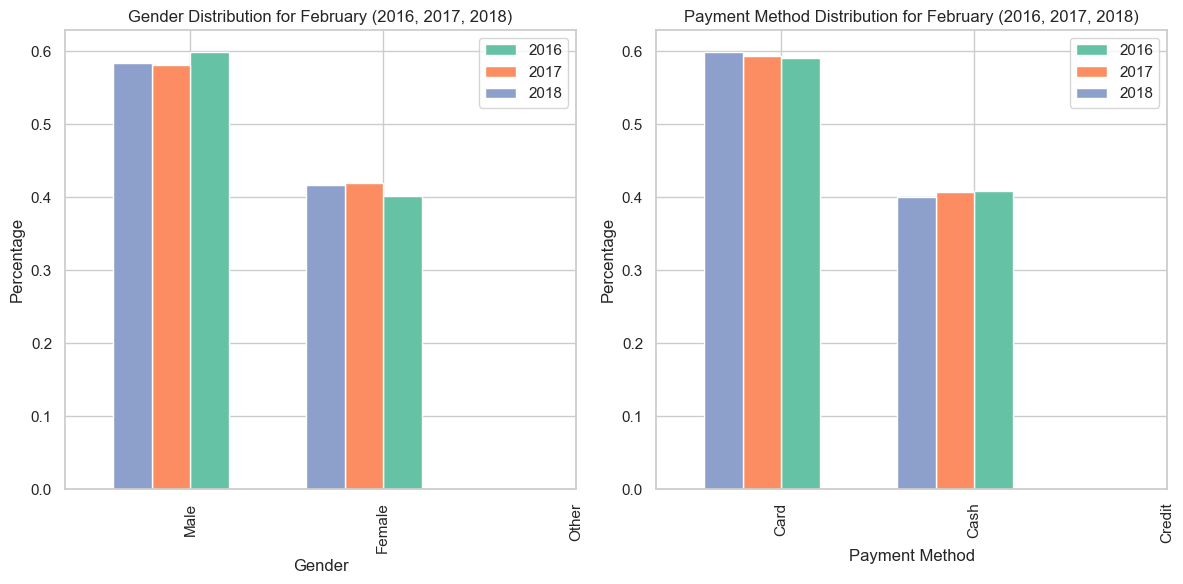

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set(style="whitegrid")

# Load transaction, customer, and cab data from CSV files
transaction_df = pd.read_csv('Transaction_ID.csv')
customer_df = pd.read_csv('Customer_ID.csv')
cab_data_df = pd.read_csv('Cab_Data.csv')

# Clean up duplicates in each dataset
transaction_df.drop_duplicates(subset='Transaction ID', inplace=True)
customer_df.drop_duplicates(subset='Customer ID', inplace=True)
cab_data_df.drop_duplicates(subset='Transaction ID', inplace=True)

# Combine transaction and customer data based on 'Customer ID'
merged_df = pd.merge(transaction_df, customer_df, on='Customer ID', how='left')

# Parse dates and extract year/month from the 'Date of Travel' column in cab data
cab_data_df['Date of Travel'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(cab_data_df['Date of Travel'], unit='D')
cab_data_df['Year'] = cab_data_df['Date of Travel'].dt.year
cab_data_df['Month'] = cab_data_df['Date of Travel'].dt.month

# Check for missing values in the merged dataset
if merged_df.isnull().any().any():
    print("Warning: Missing values found in the merged dataset.")

# Filter and analyze transactions for February in each year
february_2016 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2016) & (cab_data_df['Month'] == 2)]
february_2017 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2017) & (cab_data_df['Month'] == 2)]
february_2018 = merged_df[(merged_df['Payment_Mode'].isin(['Card', 'Credit', 'Cash'])) & (cab_data_df['Year'] == 2018) & (cab_data_df['Month'] == 2)]

# Calculate the distribution of genders and payment methods for each year
gender_distribution_2016 = february_2016['Gender'].value_counts(normalize=True)
gender_distribution_2017 = february_2017['Gender'].value_counts(normalize=True)
gender_distribution_2018 = february_2018['Gender'].value_counts(normalize=True)

payment_distribution_2016 = february_2016['Payment_Mode'].value_counts(normalize=True)
payment_distribution_2017 = february_2017['Payment_Mode'].value_counts(normalize=True)
payment_distribution_2018 = february_2018['Payment_Mode'].value_counts(normalize=True)

# Set some nice colors for our plots
colors = sns.color_palette("Set2")

# Create colorful bar graphs
plt.figure(figsize=(12, 6))

# Define the positions for the bars on the x-axis
x_positions_gender = [0, 1, 2]
x_positions_payment = [0, 1, 2]

# Create subplots for gender distribution and payment method distribution
plt.subplot(1, 2, 1)
gender_distribution_2016.plot(kind='bar', color=colors[0], label='2016', width=0.2, position=0, align='center')
gender_distribution_2017.plot(kind='bar', color=colors[1], label='2017', width=0.2, position=1, align='center')
gender_distribution_2018.plot(kind='bar', color=colors[2], label='2018', width=0.2, position=2, align='center')

plt.title('Gender Distribution for February (2016, 2017, 2018)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(x_positions_gender, ['Male', 'Female', 'Other'])
plt.legend()

plt.subplot(1, 2, 2)
payment_distribution_2016.plot(kind='bar', color=colors[0], label='2016', width=0.2, position=0, align='center')
payment_distribution_2017.plot(kind='bar', color=colors[1], label='2017', width=0.2, position=1, align='center')
payment_distribution_2018.plot(kind='bar', color=colors[2], label='2018', width=0.2, position=2, align='center')

plt.title('Payment Method Distribution for February (2016, 2017, 2018)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.xticks(x_positions_payment, ['Card', 'Cash', 'Credit'])
plt.legend()

# Make it look nice and tight
plt.tight_layout()

# Show the graphs
plt.show()
